
# Adiabatic invariants


In Mechanics, *exact conservation laws* - such as the
conservation of energy, momentum, or angular momentum - are a
direct consequence of continuous symmetries. For example, the
conservation of momentum results from a system's symmetry
with respect to translations, while the conservation of angular
momentum results from symmetry with respect to rotations.


However, there is another general form of *approximate* conservation
that is unrelated to system symmetries. Instead, this phenomenon
appears when external parameters are slowly varied. We don't refer
to this as a "conservation law" but rather as *adiabatic
invariance* because the constancy is not perfect. Although it is
an approximation, the degree of quasi-conservation improves
exponentially with the slowness of the parameter change, making the
invariance practically indistinguishable from a true conservation law.


This type of invariance applies specifically to almost periodic
motion, where the system's parameters change only slightly over each
period. The degree of quasi-conservation depends on the ratio of two
time scales: the period of the near periodic motion, and the
long time period over which the parameters are varied.

A goal of this assignment is to analyze the motion of a simple mechanical 
system and numerically verify conservation of adiabatic invariant.


## Particle in a one-dimensional box

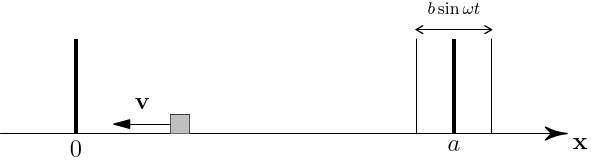


Consider a particle that slides without friction on a horizontal surface and collides elastically with two walls. 
The left wall at $x_L = 0$ is at rest, while the right wall undergoes a prescribed motion $x_R = l(t)$.
This system does not possess continuous symmetries with respect to translation in time and space, 
therefore neither energy nor linear momentum of the particle are conserved.

However, if the right wall is moving slowly, i.e.
$\frac{\mathrm{d}l}{\mathrm{d}t} \ll v$, where $v = v(t)$ is the speed of the particle, 
then the general theory of adiabtic invariance predicts that $$l(t) v(t) \approx \mathrm{const} \tag{1}$$

For numerical calculations in this assignment we use

$$l(t) = a + b \sin \omega t,$$

where $b < a$ so that $l(t) > 0$.

The velocity of the moving wall,

$$v_{R} \equiv \frac{\mathrm{d} l}{\mathrm{d} t} = b \, \omega \, \cos(\omega t) .$$ 

The "slowness" of the rignt wall means that $v(t) \ll \omega b$.


Since the collision particle-wall is elastic, the velocities of the particle just before and after the collision with the moving wall are related as follows:

$$v_{after} =  -v_{before} + 2 v_{R} = -v_{before} + 2 b \, \omega \, \cos(\omega t), $$

where $t$ is the instance of a collision, and $v_{R}$ is the velocity of the moving wall at the instance of collision.

The velocities of the particle just before and after the collision with the stationary wall are:

$$v_{after} =  -v_{before}.$$


The instances of collisions with the left wall are solutions of the equation

$$x(t) = 0$$

The instances of collisions with the right wall are solutions of the equation

$$x(t) - a - b\, \sin(\omega t) = 0$$


Since the particle's motion between collisions is frictionless, the velocity of the particle remains constant, 
i.e. particle's accelereation between collisions is zero. Thus, the equation of motion of the particle between collisions
$$\frac{\mathrm{d}^2 x}{\mathrm{d} t^2} = 0 .$$


## Dimensionless units


Let's introduce dimensionless units:

$$X = \frac{y}{b}, \quad V = \frac{v}{v_0}, \quad \tau =  \frac{t \, v_0}{b}, \quad \Omega = \frac{\omega \, b}{v_0} ,$$

where $v_0$ is the initial velocity of of particle.


In the new variables the equation of motion are as follows:

$$\frac{\mathrm{d}^2 X}{\mathrm{d}\tau^2} = 0,$$

or

$$\frac{\mathrm{d}X}{\mathrm{d}\tau} = V, \quad \frac{\mathrm{d}V}{\mathrm{d}\tau} = 0.$$

where $V$ is the dimensionless velocity of the ball.


The conditions of the collision in the dimensionless units are as follows:

$$X_{collision} - sin(\Omega \tau) = 0, \quad V_{after} = -V_{before} + 2 \Omega \cos(\Omega \tau) $$

for the right wall, and

$$X_{collision} = 0, \quad V_{after} = -V_{before} $$

for the left wall.


## Numerical solution


Load required packages.

In [ ]:

using OrdinaryDiffEqTsit5
using PyPlot


The right hand side of the equation of motion, written in a vector form:

In [ ]:

"""
    particle!(dudt, u, p, tau)

RHS of the equations of motion in the adiabatic invariant problem. u = [X, V].
"""
function particle!(dudt, u, p, tau)
    dudt[1] = your_code here
    dudt[2] = your_code_here
    return nothing
end


The position and the velocity of the right wall: 

In [ ]:

wall_position(tau) = sin(Omega*tau) + L

In [ ]:

wall_velocity(tau) = Omega*cos(Omega*tau)


The condition of collision of the particle with the moving (right) wall: $u[1] - wall\_position(t) = 0$.  

In [ ]:

function condition_right(u, tau, integrator)
    # your_code_here
end


The condition of collision of the particle with the stationary (left) wall: $u[1] = 0$.  

In [ ]:

function condition_left(u, tau, integrator)
    # your_code_here
end


Change the velocity of the particle at the instant of collision with the moving wall. Uthe the function `wall_velocity`.

In [ ]:

function affect_right!(integrator)
    # your_code_here
end


Change the velocity of the particle at the instant of collision with the left wall. 
In addition, we use this function save the value of the adiabatic invariant and the time of collision for later use.

In [ ]:

function affect_left!(integrator)
    your_code_here  # reflection from the stationary wall
    push!(adiabatic_invariant, abs(integrator.u[2]) * wall_position(integrator.t)) # store the adiabatic invariant of the system
    push!(collision_times, integrator.t)  # store the time of collision
end


Callbacks:

In [ ]:

cb_right = ContinuousCallback(your_code_here)
cb_left = ContinuousCallback(your_code_here)
cb_complete = CallbackSet(cb_right, cb_left);


Initial conditions and parameters:

In [ ]:

p = 0.0              # free particle, value not used
const Omega = 0.05   # frequency of slow oscillations of the right wall
const L = 4.0        # (averaged) distance between walls
u0 = [L/2, 1.0]     # initial conditions
tspan = (0.0, 200.0);


Initialize arrays for storing adiabatic invariant and times of collisions:

In [ ]:

adiabatic_invariant = Float64[]
collision_times = Float64[]


ODE problem statement:

In [ ]:

prob = ODEProblem(your_code_here);


Numerical solution:

In [ ]:

sol = solve(prob, Tsit5(), callback=cb_complete, dtmax=0.1);


## Testing conservation of adiabatic invariant


Plot the positions of the particle and the walls as functions of time:

In [ ]:

plot(sol.t, sol[1,:], label="particle")
plot(sol.t, wall_position.(sol.t), label="right wall", linestyle="dashdot")
plot(sol.t, sol.t * 0, label="left wall", linestyle="dashed")
# add grid, title, legend, axes labels


Plot the distance between the walls, the velocity of the particle, and the adiabatic invariant as functions of time:

In [ ]:

plot(collision_times, adiabatic_invariant, linestyle="dashed", label="adiabatic invariant")
plot(sol.t, wall_position.(sol.t), linestyle="dashdot", label="distance between walls")
plot(sol.t, abs.(sol[2,:]), linestyle="solid", label="particle speed")
# add grid, title, legend, axes labels

Notice significant variations in the particle speed, $v(\tau)$, and distance between walls, $l(\tau) = L + sin(\Omega \, \tau)$, 
but almost perfect conservation of the adiabatic invariant which is $l(\tau) v(\tau)$. 